In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [ ]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

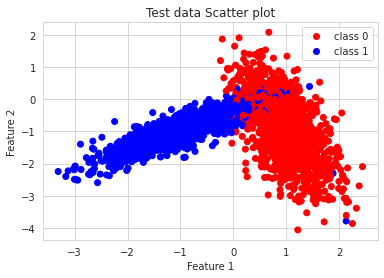

In [ ]:
cmap_bold = ListedColormap(['#FF0000','#0000FF'])
ax = plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap=cmap_bold)
hands, _ = ax.legend_elements()   # https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
plt.legend(handles=hands,labels=['class 0','class 1'])  
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test data Scatter plot')
plt.show()

# Implementing Custom RandomSearchCV

In [ ]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):

    params = np.sort(np.random.choice(np.arange(param_range[0],param_range[1]+1),10, replace=False)) #10 unique values for params

    groups_x=[] #to contain group of x_train data based on folds
    groups_y=[]
    size=int(len(x_train)/folds) #size of each group
    for i in range(0,folds-1):
        indices = np.random.choice(x_train.shape[0],size, replace=False)  # https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array
        groups_x.append(x_train[indices]) 
        groups_y.append(y_train[indices]) 
        x_train = np.delete(x_train,indices,axis=0)  # https://numpy.org/doc/stable/reference/generated/numpy.delete.html
        y_train = np.delete(y_train,indices,axis=0) 
    groups_x.append(x_train) # allocating last remaining points to last group
    groups_y.append(y_train)

    trainscores = [] #for storing mean score for each hyperparameter
    testscores  = [] 
    for k in params:
        trainscores_folds = [] #for storing score of each group while doing cross validation
        testscores_folds  = []
        for j in range(0,folds):
           cv_xtest=groups_x[j] #CV set
           cv_ytest=groups_y[j]
           cv_xtrain=np.vstack(np.delete(groups_x,j,axis=0)) #training data
           cv_ytrain=np.hstack(np.delete(groups_y,j,axis=0))
           
           classifier.n_neighbors = k
           classifier.fit(cv_xtrain,cv_ytrain)
    
           Y_predicted = classifier.predict(cv_xtest)
           testscores_folds.append(accuracy_score(cv_ytest, Y_predicted))
           
           Y_predicted = classifier.predict(cv_xtrain)
           trainscores_folds.append(accuracy_score(cv_ytrain, Y_predicted))
      
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))

    return params, trainscores, testscores  
    

In [ ]:
param,trainscores,testscores=RandomSearchCV(X_train,y_train,KNeighborsClassifier(),(3,50),3)   #doing '3' fold CV

In [ ]:
print('hyperparameter (k):',param)

hyperparameter (k): [ 4  9 17 21 25 33 34 37 40 46]


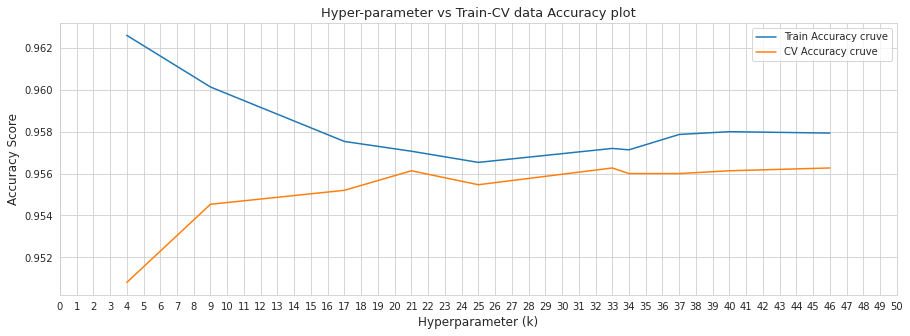

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.plot(param,trainscores, label='Train Accuracy cruve')
plt.plot(param,testscores, label='CV Accuracy cruve')
plt.xticks(np.arange(0,51))
plt.title('Hyper-parameter vs Train-CV data Accuracy plot',fontsize=13)
plt.xlabel('Hyperparameter (k)',fontsize=12)
plt.ylabel('Accuracy Score',fontsize=12)
plt.legend()
plt.show()

**Observation:**

- Selecting k=21

In [ ]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.colorbar(ticks=[0,0.5,1],label='Decision Surface Probability')  #https://stackoverflow.com/a/44729913 , https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
    # Plot also the training points
    ax = plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class Classification (k = %i)" % (clf.n_neighbors))
    hands, _ = ax.legend_elements()
    plt.legend(handles=hands,labels=['Class 0','Class 1'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

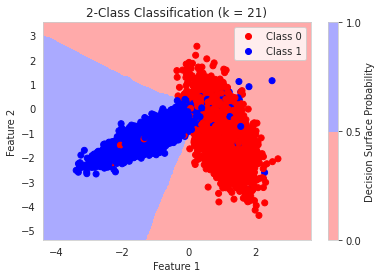

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)